<a href="https://colab.research.google.com/github/ferviotto/imersao_python_alura_aula5/blob/main/imersao_python_alura_aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download("JNJ", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()
dados

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,145.869995,146.020004,145.080002,145.970001,130.099106,5777000
1,2020-01-03,143.500000,145.369995,143.000000,144.279999,128.592850,5752400
2,2020-01-06,144.000000,144.199997,142.850006,144.100006,128.432434,7731300
3,2020-01-07,144.009995,145.449997,141.380005,144.979996,129.216766,7382900
4,2020-01-08,144.869995,145.979996,143.699997,144.960007,129.198929,6605800
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [7]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']
dados_treino
dados_teste

,Date,Open,High,Low,Close,Adj Close,Volume
899,2023-07-31,169.690002,170.220001,166.710007,167.529999,163.757706,22632700
900,2023-08-01,166.369995,169.089996,166.059998,168.889999,165.087097,15810300
901,2023-08-02,168.850006,171.240005,168.850006,169.910004,166.084122,14595600
902,2023-08-03,169.949997,171.320007,169.669998,170.639999,166.797699,17424800
903,2023-08-04,170.339996,172.679993,167.889999,169.039993,165.233719,23414300
...,...,...,...,...,...,...,...
1001,2023-12-22,155.250000,156.529999,155.020004,155.460007,154.288544,3798500
1002,2023-12-26,155.000000,156.350006,154.850006,156.139999,154.963409,4170000
1003,2023-12-27,155.500000,156.520004,155.419998,156.350006,155.171844,5288100
1004,2023-12-28,156.000000,157.240005,155.990005,156.580002,155.400101,4377500


In [6]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
dados_prophet_treino

,ds,y
0,2020-01-02,145.970001
1,2020-01-03,144.279999
2,2020-01-06,144.100006
3,2020-01-07,144.979996
4,2020-01-08,144.960007
...,...,...
894,2023-07-24,171.080002
895,2023-07-25,172.389999
896,2023-07-26,172.720001
897,2023-07-27,173.690002


In [8]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='US')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3pvaf1lm/2dqomius.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3pvaf1lm/lw7lbxvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54835', 'data', 'file=/tmp/tmp3pvaf1lm/2dqomius.json', 'init=/tmp/tmp3pvaf1lm/lw7lbxvx.json', 'output', 'file=/tmp/tmp3pvaf1lm/prophet_modelh5as58bw/prophet_model-20240401155627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [10]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)
futuro
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,145.217568,155.365987,146.122755,146.122755,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,144.967007,155.600075,146.098731,146.098731,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,144.218126,154.648621,146.026658,146.026658,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,143.949566,154.727159,146.002633,146.002633,0.0,0.0,0.0,0.0,...,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,144.120306,154.352078,145.978609,145.978609,0.0,0.0,0.0,0.0,...,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2023-12-21,149.716419,143.484404,166.394441,139.123451,160.247667,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.602463,4.602463,4.602463,0.0,0.0,0.0,154.573358
1045,2023-12-22,149.663754,142.824490,166.215686,138.940827,160.316372,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,4.732636,4.732636,4.732636,0.0,0.0,0.0,154.789936
1046,2023-12-23,149.611089,141.668956,165.651175,138.731099,160.385078,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.832364,4.832364,4.832364,0.0,0.0,0.0,153.893662
1047,2023-12-24,149.558424,141.870646,166.009931,138.521371,160.447679,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,4.900118,4.900118,4.900118,0.0,0.0,0.0,153.908751


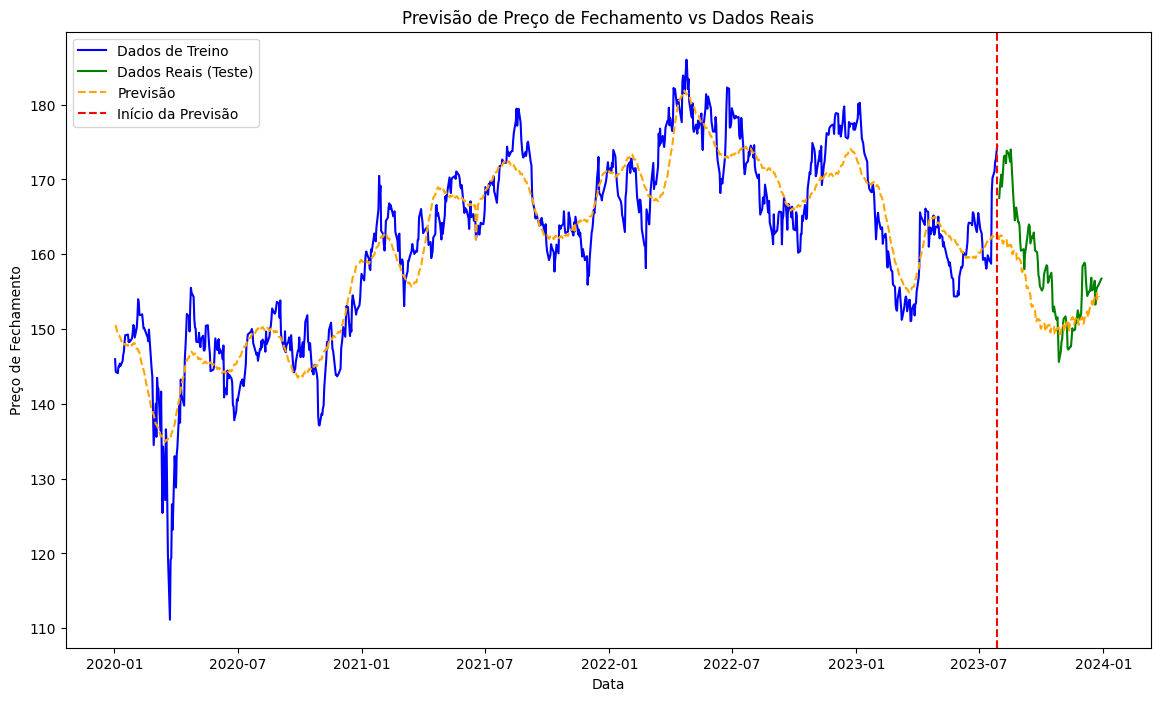

In [11]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()

Desafio

In [17]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=200)
previsao = modelo.predict(futuro)
futuro
previsao

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,146.122755,145.351665,155.966480,146.122755,146.122755,0.0,0.0,0.0,0.0,...,0.254476,0.254476,0.254476,4.129962,4.129962,4.129962,0.0,0.0,0.0,150.507194
1,2020-01-03,146.098731,145.540276,155.932286,146.098731,146.098731,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,3.930311,3.930311,3.930311,0.0,0.0,0.0,150.422588
2,2020-01-06,146.026658,143.907494,154.680209,146.026658,146.026658,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,3.290189,3.290189,3.290189,0.0,0.0,0.0,149.305952
3,2020-01-07,146.002633,144.175131,154.353834,146.002633,146.002633,0.0,0.0,0.0,0.0,...,0.158517,0.158517,0.158517,3.077639,3.077639,3.077639,0.0,0.0,0.0,149.238789
4,2020-01-08,145.978609,143.599947,154.624856,145.978609,145.978609,0.0,0.0,0.0,0.0,...,0.303936,0.303936,0.303936,2.872514,2.872514,2.872514,0.0,0.0,0.0,149.155059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,2024-02-09,147.083174,132.738741,165.634926,132.686905,163.448218,0.0,0.0,0.0,0.0,...,0.393547,0.393547,0.393547,0.609941,0.609941,0.609941,0.0,0.0,0.0,148.086661
1095,2024-02-10,147.030509,130.745649,164.351227,132.529005,163.499276,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,0.276654,0.276654,0.276654,0.0,0.0,0.0,146.757372
1096,2024-02-11,146.977844,130.924517,163.714713,132.400870,163.550334,0.0,0.0,0.0,0.0,...,-0.549791,-0.549791,-0.549791,-0.079313,-0.079313,-0.079313,0.0,0.0,0.0,146.348740
1097,2024-02-12,146.925179,131.421822,164.275179,132.091981,163.669244,0.0,0.0,0.0,0.0,...,-0.010894,-0.010894,-0.010894,-0.454880,-0.454880,-0.454880,0.0,0.0,0.0,146.459405


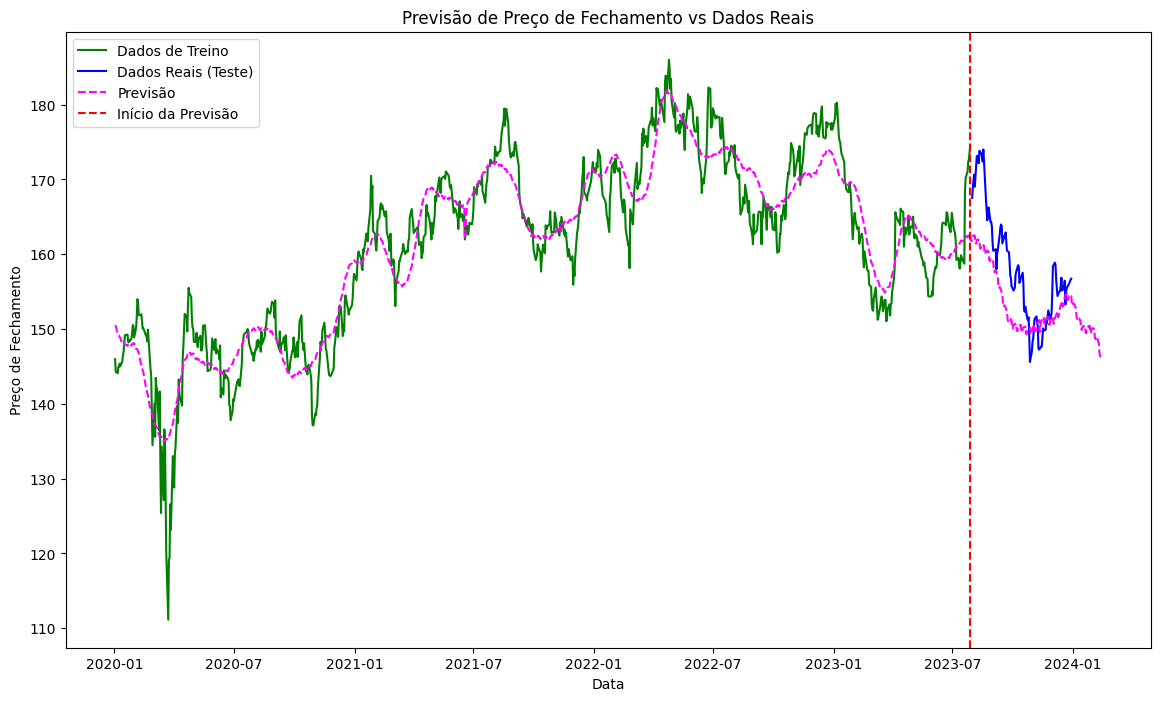

In [23]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='green')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='blue')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='magenta', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()